# Learn how to create bar chart, histogram, scatter plot, and line chart in Python

## Contains:
### Order DOW bar chart
### Prices Histogram
### Prices by DOW line chart

## 1. Import data and libraries

In [1]:
#import libraries including those meeded for visualizations 
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
#create file path
data_path = r'C:\Users\krist\08.2023_InstacartBasketAnalysis\02.Data'

In [3]:
#import latest prepared dataset and check import
df_ords_prods_merged = pd.read_pickle(os.path.join(data_path, 
                                                   'Prepared_Data', 
                                                   'orders_products_merged_4.8_task.pkl'))
df_ords_prods_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,users_avg_product_price,Spending_flag,median_days_since_last_order,frequency_flag
0,2539329,1,1,2,8,11.0,196,1,0,both,...,Mid-range product,Regularly busy,Regularly busy,average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Mid-range product,Regularly busy,Least busy days,average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
2,473747,1,3,3,12,21.0,196,1,1,both,...,Mid-range product,Regularly busy,Least busy days,most orders,10,New customer,6.367797,Low spender,20.0,Regular customer
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Mid-range product,Least busy,Least busy days,average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
4,431534,1,5,4,15,28.0,196,1,1,both,...,Mid-range product,Least busy,Least busy days,most orders,10,New customer,6.367797,Low spender,20.0,Regular customer


### import successful 

## 2. Creating Bar Charts

In [ ]:
#create bar chart for day of week
df_ords_prods_merged['order_day_of_week'].value_counts().plot.bar()

In [ ]:
#sort by day of week rather than frequency
df_ords_prods_merged['order_day_of_week'].value_counts().sort_index().plot.bar()

In [ ]:
#add color to plot with color argument of .plot.bar()
ord_d_of_wk_barchart = df_ords_prods_merged['order_day_of_week'].value_counts().sort_index().plot.bar(color = 
                                                    ['midnightblue', 'darkblue', 'royalblue', 'cornflowerblue', 'cornflowerblue', 'royalblue', 'mediumblue'])

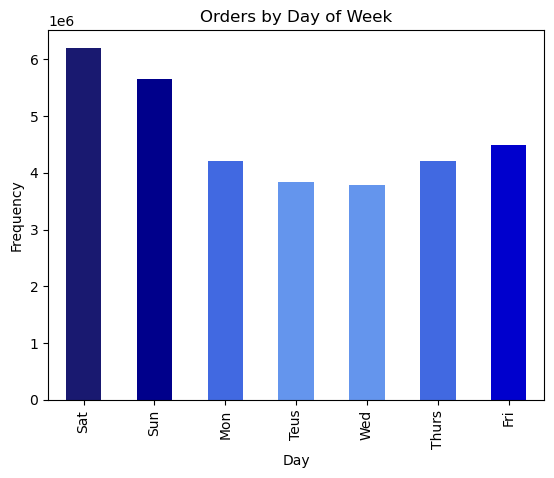

In [12]:
#add axis labels and title
labels = ['Sat', 'Sun', 'Mon', 'Teus', 'Wed', 'Thurs', 'Fri']
ord_d_of_wk_barchart.set_xlabel('Day')
ord_d_of_wk_barchart.set_xticklabels(labels)
ord_d_of_wk_barchart.set_ylabel('Frequency')
ord_d_of_wk_barchart.set_title('Orders by Day of Week')
ord_d_of_wk_barchart.figure

## 3. Steps for Exporting charts

In [ ]:
#export figure as image file use more generic file path 
path = r'C:\Users\krist\08.2023_InstacartBasketAnalysis'
ord_d_of_wk_barchart.figure.savefig(os.path.join(path, 
                                                 '04.Analysis', 
                                                 'Visualizations', 
                                                 'bar_ords_dow.png'))

## 4. Creating Histograms and Scatter Plots

In [ ]:
#create a histogram of prices
df_ords_prods_merged['prices'].plot.hist(bins = 25)

### first time this was run histogram was broken because there were extreme values (99,999) in the prices column forcing all the lower values into one 

In [ ]:
#create a scatterplot to investigate for outliers
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merged)

## Address outliers that slipped through in cleaning stage

### outliers appear to be around 20,000 and 100,000

In [ ]:
#assuming any price above 100 is an outlier check to see how many are above this threshold
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] >100]

### 5,127 rows with prices over 100 this is less than 1% of total rows

In [ ]:
#assign outlier values in prices (over 100) to NaNs
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [ ]:
#check assignment of outliers was successful
df_ords_prods_merged['prices'].max()

### new max of prices is 25 assignment of outliers to nan successful

## Retry histogram with new, clean prices 

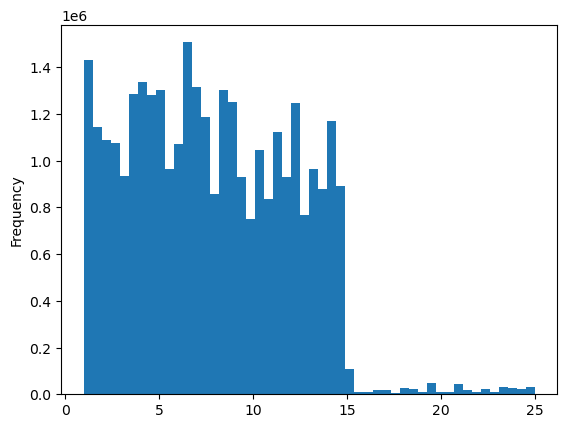

In [14]:
#create a histogram of prices
hist_prices =df_ords_prods_merged['prices'].plot.hist(bins = 50)

### most products cost between 1 and 15 dollars with few being between 15 and 25 dollars

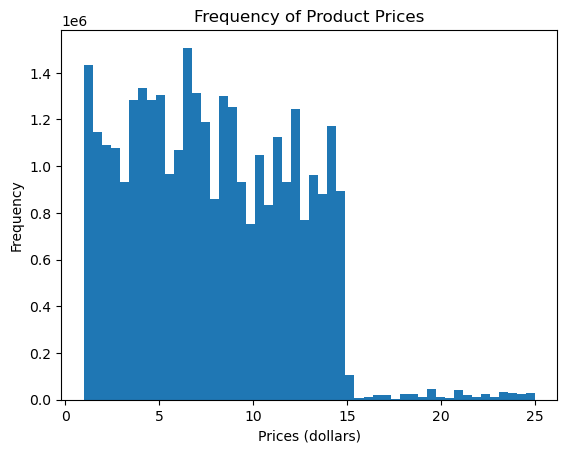

In [15]:
hist_prices.set_title('Frequency of Product Prices')
hist_prices.set_xlabel('Prices (dollars)')
hist_prices.figure

In [ ]:
#export histogram
hist_prices.figure.savefig(os.path.join(path, 
                                        '04.Analysis', 
                                        'Visualizations', 
                                        'hist_prices.png'))

In [4]:
#investigate price cliff after $15
df_ords_prods_merged['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [6]:
#Look at distribution of prices in excel to calculate percentage of products priced over $15
price_dist = df_ords_prods_merged['prices'].value_counts()

In [7]:
price_dist.to_clipboard()

### 1% of products are priced above 15 dollars

## 5. Getting a representative sample from data

In [17]:
#get random sample from dataframe
#create list dev with bool from test np.random.rand() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merged)) <= 0.7

In [18]:
#store 70% of sample in df big
big = df_ords_prods_merged[dev]

In [19]:
#store 30% of sample in df small
small = df_ords_prods_merged[~dev]

In [20]:
#check that sum of rows of big and small equal to original df_ords_prods_merged
len(big) + len(small) == len(df_ords_prods_merged)

True

In [21]:
#create subset that only contains columns for line chart
df_2 = small[['order_day_of_week','prices']]

## 6. Creating Line Charts

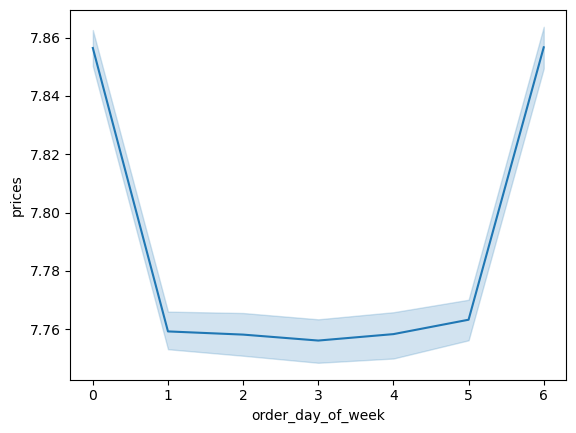

In [22]:
line_chart = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [24]:
#create day labels
labels = ['Sat', 'Sun', 'Mon', 'Teus', 'Wed', 'Thurs', 'Fri']

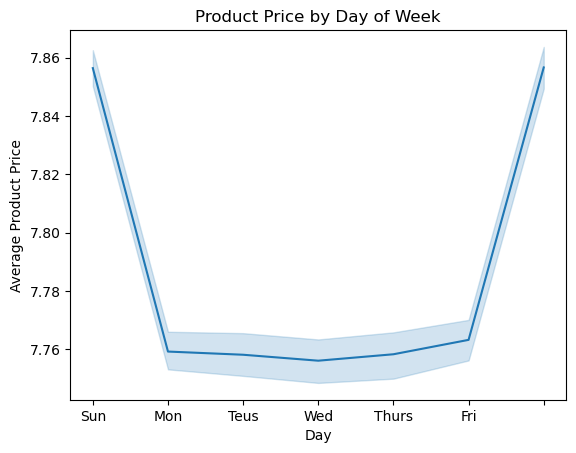

In [32]:
#add axis labels and title
line_chart.set_xlabel('Day')
line_chart.set_ylabel('Average Product Price')
line_chart.set_title('Product Price by Day of Week')
line_chart.figure

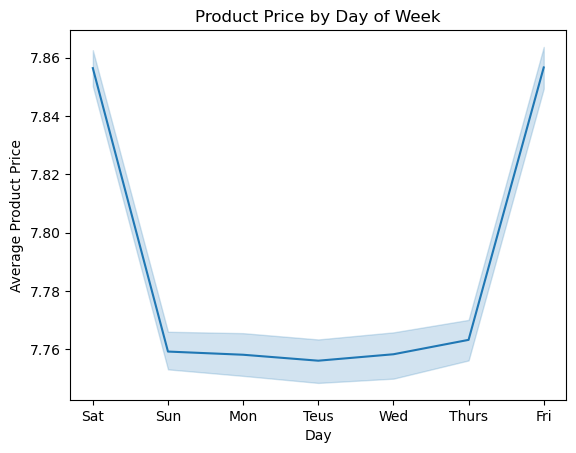

In [36]:
#fix tick labels
line_chart.set_xticks(np.arange(len(labels)))
line_chart.set_xticklabels(labels)
line_chart.figure

In [38]:
#export line chart
line_chart.figure.savefig(os.path.join(path, 
                                       '04.Analysis', 
                                       'Visualizations', 
                                       'price_by_dow_line.png'))